In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text
from WindPy import w
%matplotlib inline

In [21]:
w.start()

.ErrorCode=0
.Data=[Already conntected!]

In [296]:
start_date, end_date = '2016-09-01', '2020-08-17'

In [297]:
data = w.wset("sectorconstituent","sectorid=a39901011g000000;field=wind_code,sec_name") ## 申万一级行业
# data = w.wset("sectorconstituent","sectorid=a39901011h000000;field=wind_code,sec_name") ## 申万一级行业

In [298]:
df = pd.DataFrame(data.Data, index=data.Fields)
df = df.T

In [299]:
data = w.wsd(df['wind_code'].tolist(), 'close', start_date, end_date, 'Period=M')

In [300]:
prices = pd.DataFrame(data.Data, index=data.Codes, columns=data.Times)
prices = prices.T

In [301]:
data = w.wsd('000906.SH', 'close', start_date, end_date, 'Period=M')

In [302]:
bench = pd.DataFrame(data.Data, index=data.Codes, columns=data.Times)
bench = bench.T

In [303]:
returns = prices.pct_change()
bench_ret = bench.pct_change()

# 与利率的敏感性

In [304]:
data = w.wsd('S0059749', 'close', start_date, end_date, 'Period=M')

In [305]:
bond = pd.DataFrame(data.Data, index=['rate'], columns=data.Times)
bond = bond.T

In [306]:
bond_chg = bond.pct_change()

In [307]:
correlations = pd.DataFrame(index=returns.columns, columns=['利率敏感性'])
for col in returns:
    excess_return = returns[col] - bench_ret['000906.SH']
    correlations.loc[col, '利率敏感性'] = excess_return.corr(bond_chg['rate'])

In [308]:
data = w.wss(correlations.index.tolist(), 'sec_name')

In [309]:
correlations['证券名称'] = data.Data[0]

In [310]:
correlations = correlations.sort_values('利率敏感性')

In [311]:
correlations

,利率敏感性,证券名称
801750.SI,-0.441356,计算机(申万)
801230.SI,-0.39953,综合(申万)
801130.SI,-0.375972,纺织服装(申万)
801730.SI,-0.361825,电气设备(申万)
801890.SI,-0.324314,机械设备(申万)
801770.SI,-0.301063,通信(申万)
801710.SI,-0.284157,建筑材料(申万)
801740.SI,-0.258003,国防军工(申万)
801140.SI,-0.229957,轻工制造(申万)
801760.SI,-0.206387,传媒(申万)


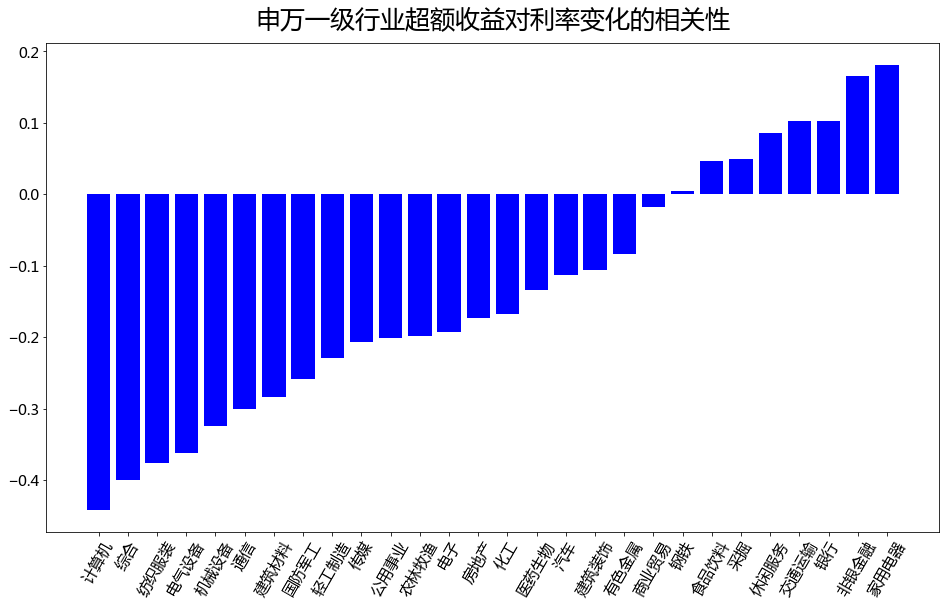

In [314]:
fig, ax = plt.subplots(figsize=(16, 9))

x = np.arange(correlations.shape[0])

ax.bar(x, correlations['利率敏感性'], color='blue')

ax.set_xticks(x)
_ = ax.set_xticklabels([x.rstrip('(申万)') for x in correlations['证券名称']], rotation=60, fontsize=15)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

_ = ax.set_title('申万一级行业超额收益对利率变化的相关性', fontsize=25, y=1.02)
fig.savefig(u'C:/Users/zhangyang01/Desktop/申万一级行业对利率变化的敏感性.png', format='png', dpi=400, bbox_inches='tight')

In [234]:
data = w.wsd('000931.CSI,000933.SH', 'close', '2010-01-01', '2020-07-29', 'Period=M')

In [199]:
style = pd.DataFrame(data.Data, columns=data.Times, index=data.Codes)
style = style.T

In [59]:
data = w.wsd('S0059749', 'close', start_date, end_date, 'Period=M')

In [60]:
bond = pd.DataFrame(data.Data, index=['rate'], columns=data.Times)
bond = bond.T
bond.index = pd.to_datetime(bond.index)

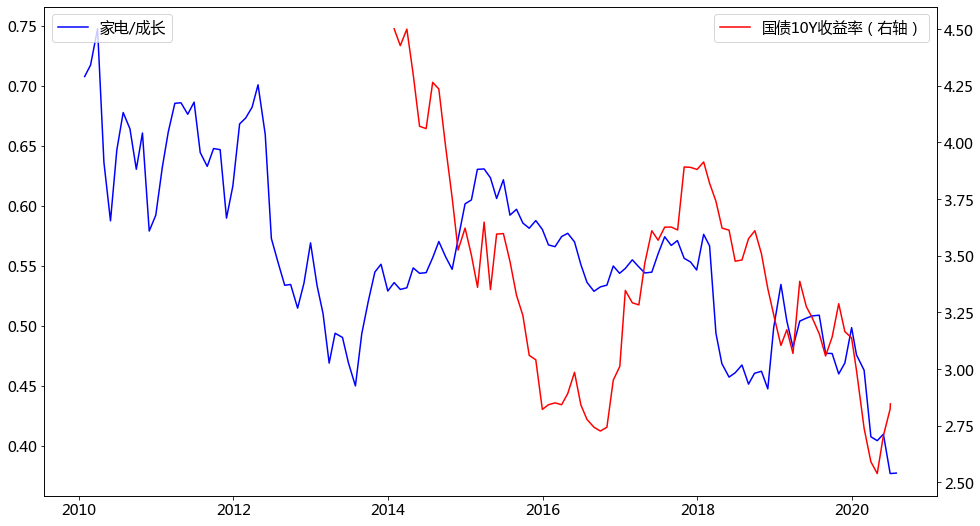

In [61]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(style['000931.CSI'] / style['000933.SH'], color='blue', label='家电/成长')
axx = ax.twinx()
axx.plot(bond[bond.index >= '2010-01-01']['rate'], color='red', label='国债10Y收益率（右轴）')

ax.legend(fontsize=15, loc='upper left')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
axx.legend(fontsize=15, loc='upper right')
axx.yaxis.set_tick_params(labelsize=15)

# _ = ax.set_title('申万一级行业对利率变化的敏感性', fontsize=25, y=1.02)
# fig.savefig(u'C:/Users/zhangyang01/Desktop/申万一级行业对利率变化的敏感性.png', format='png', dpi=400, bbox_inches='tight')

# 对PMI的敏感性

In [233]:
pmi = pd.read_excel('./data/pmi.xlsx', skiprows=1, index_col=0)

In [234]:
pmi.index = returns.index[:-1]

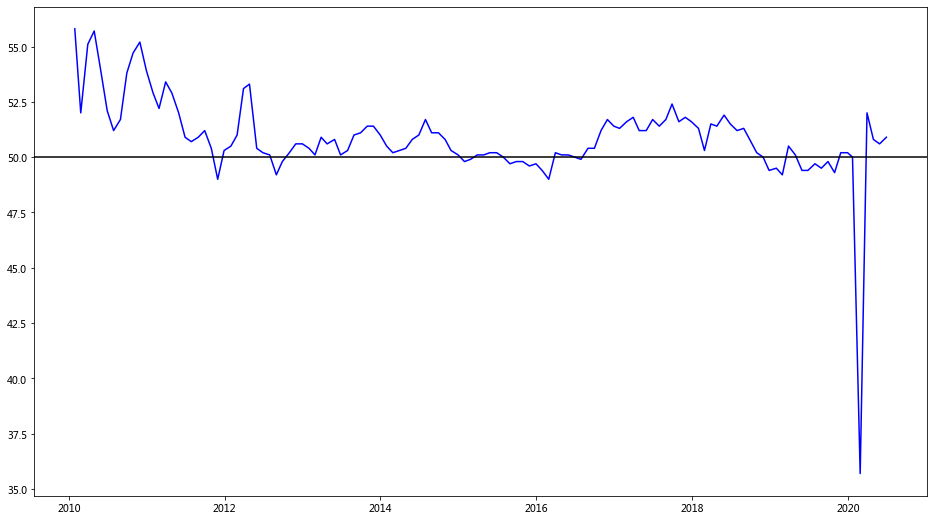

In [235]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(pmi['PMI'], color='blue')
ax.axhline(50, color='black')

In [236]:
for i in range(1, 5):
    dates = pmi[pmi['阶段'] == i].index
    if i == 1:
        correlations['trough to 50'] = returns.loc[dates].median()
    elif i == 2:
        correlations['50 to peak'] = returns.loc[dates].median()
    elif i == 3:
        correlations['peak to 50'] = returns.loc[dates].median()
    else:
        correlations['50 to trough'] = returns.loc[dates].median()

In [237]:
correlations.sort_values('peak to 50', ascending=False)

,利率敏感性,证券名称,trough to 50,50 to peak,peak to 50,50 to trough
801210.SI,-0.0184057,休闲服务(申万),-0.002860,0.015301,0.010647,0.008053
801150.SI,-0.100558,医药生物(申万),0.017559,0.021974,0.007710,0.012533
801710.SI,-0.0636004,建筑材料(申万),0.022311,0.009786,0.003044,0.021002
801120.SI,0.0328698,食品饮料(申万),0.012428,0.011273,0.002411,0.032039
801200.SI,0.00685909,商业贸易(申万),-0.013200,0.005432,0.001739,0.004278
801720.SI,-0.0866782,建筑装饰(申万),-0.005998,-0.001750,-0.000488,-0.021398
801890.SI,0.0250823,机械设备(申万),-0.006642,0.013234,-0.000815,0.008159
801040.SI,0.0299839,钢铁(申万),-0.005535,0.011633,-0.001078,0.004693
801160.SI,-0.163081,公用事业(申万),-0.011561,0.009724,-0.005321,-0.008030
801080.SI,0.00492735,电子(申万),0.034073,0.032826,-0.005827,0.031305


# OECD综合领先指标

In [238]:
oecd = pd.read_excel('./data/OECD综合领先指标.xlsx', index_col=0)

In [239]:
oecd.index = returns.index[:-1]

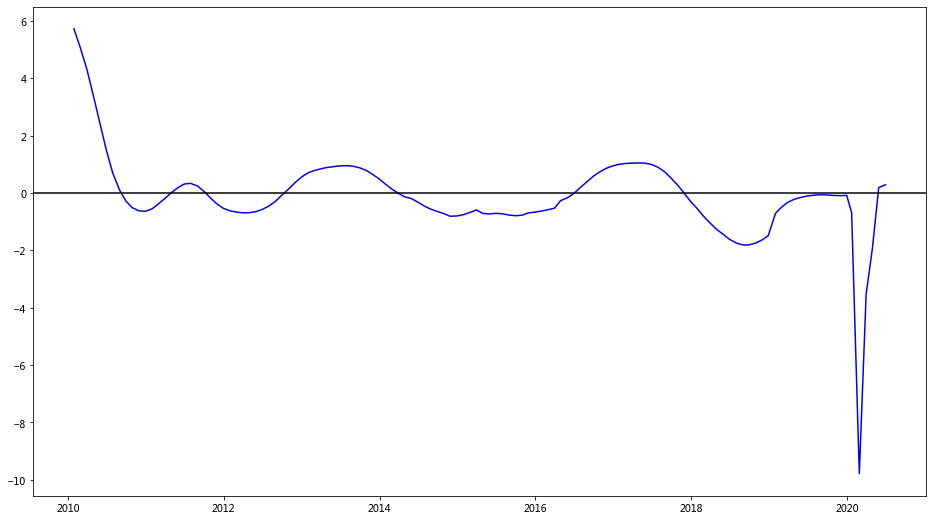

In [240]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(oecd['OECD综合领先指标:中国:同比'], color='blue')
ax.axhline(0, color='black')

In [241]:
for i in range(1, 5):
    dates = oecd[oecd['阶段'] == i].index
    if i == 1:
        correlations['trough to 50'] = returns.loc[dates].median()
    elif i == 2:
        correlations['50 to peak'] = returns.loc[dates].median()
    elif i == 3:
        correlations['peak to 50'] = returns.loc[dates].median()
    else:
        correlations['50 to trough'] = returns.loc[dates].median()

In [242]:
correlations.sort_values('50 to peak', ascending=False)

,利率敏感性,证券名称,trough to 50,50 to peak,peak to 50,50 to trough
801110.SI,0.0937863,家用电器(申万),0.022347,0.027563,0.023606,0.001169
801150.SI,-0.100558,医药生物(申万),0.016660,0.021133,0.020736,0.017269
801160.SI,-0.163081,公用事业(申万),-0.006912,0.020201,0.004536,-0.006114
801140.SI,-0.00476652,轻工制造(申万),-0.010173,0.017847,0.019927,-0.006031
801080.SI,0.00492735,电子(申万),0.033497,0.013370,0.039120,0.007231
801050.SI,-0.0159978,有色金属(申万),0.019505,0.012721,0.002082,-0.009406
801210.SI,-0.0184057,休闲服务(申万),0.000583,0.010850,0.025501,0.001448
801200.SI,0.00685909,商业贸易(申万),-0.008448,0.008385,0.005323,-0.000354
801030.SI,-0.0223406,化工(申万),-0.003134,0.007984,0.005825,0.003212
801740.SI,-0.0656171,国防军工(申万),-0.000618,0.007695,-0.012494,0.000845


In [243]:
correlations.median()

利率敏感性          -0.020373
trough to 50   -0.000372
50 to peak      0.003804
peak to 50      0.003767
50 to trough   -0.000446
dtype: float64

# PPI敏感性

In [76]:
data = w.edb('M0001227', start_date, end_date)

In [77]:
ppi = pd.DataFrame(data.Data, columns=data.Times, index=['ppi'])
ppi = ppi.T

In [78]:
for col in returns:
    excess_return = returns[col] - bench_ret['000906.SH']
    correlations.loc[col, 'ppi敏感性'] = excess_return.corr(ppi['ppi']/100)

In [79]:
correlations = correlations.sort_values('ppi敏感性')

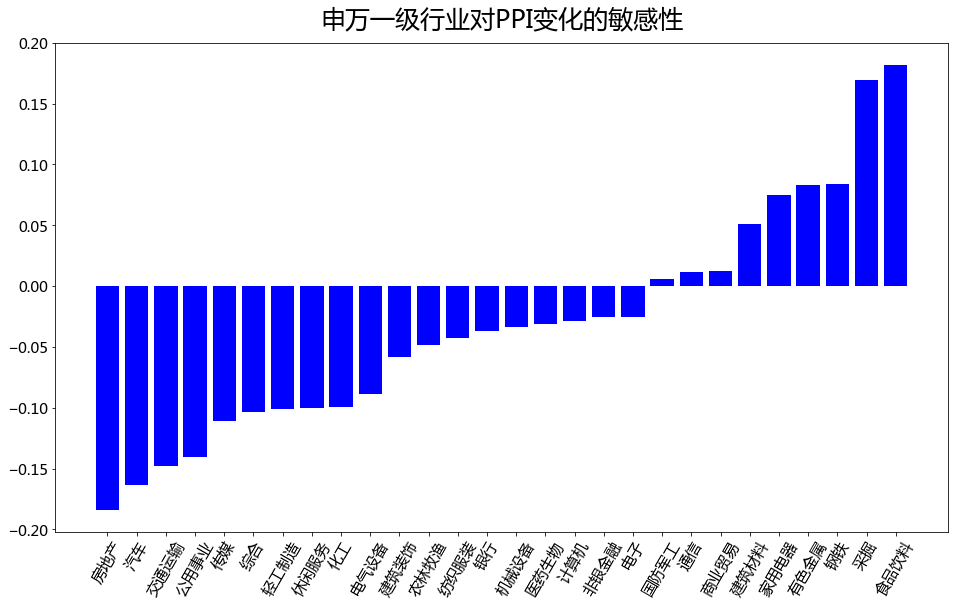

In [80]:
fig, ax = plt.subplots(figsize=(16, 9))

x = np.arange(correlations.shape[0])

ax.bar(x, correlations['ppi敏感性'], color='blue')

ax.set_xticks(x)
_ = ax.set_xticklabels([x.rstrip('(申万)') for x in correlations['证券名称']], rotation=60, fontsize=15)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

_ = ax.set_title('申万一级行业对PPI变化的敏感性', fontsize=25, y=1.02)

# ROE与利率敏感性

In [81]:
data = w.wss(correlations.index.tolist(), "west_avgroe_FY1", "tradeDate=20200726")

In [82]:
correlations['roe'] = data.Data[0]

In [83]:
data = w.wss(correlations.index.tolist(), "mkt_cap_ard", "tradeDate=20200726")

In [84]:
correlations['cap'] = data.Data[0]

In [85]:
correlations.head()

,利率敏感性,证券名称,ppi敏感性,roe,cap
801180.SI,-0.0609643,房地产(申万),-0.183673,13.6149,2.238266e+12
801880.SI,-0.0151077,汽车(申万),-0.163086,5.8372,1.917488e+12
801170.SI,0.0268724,交通运输(申万),-0.147698,4.2232,2.369117e+12
801160.SI,-0.163354,公用事业(申万),-0.140492,7.9143,2.256146e+12
801760.SI,-0.0725872,传媒(申万),-0.110461,3.2178,1.979430e+12


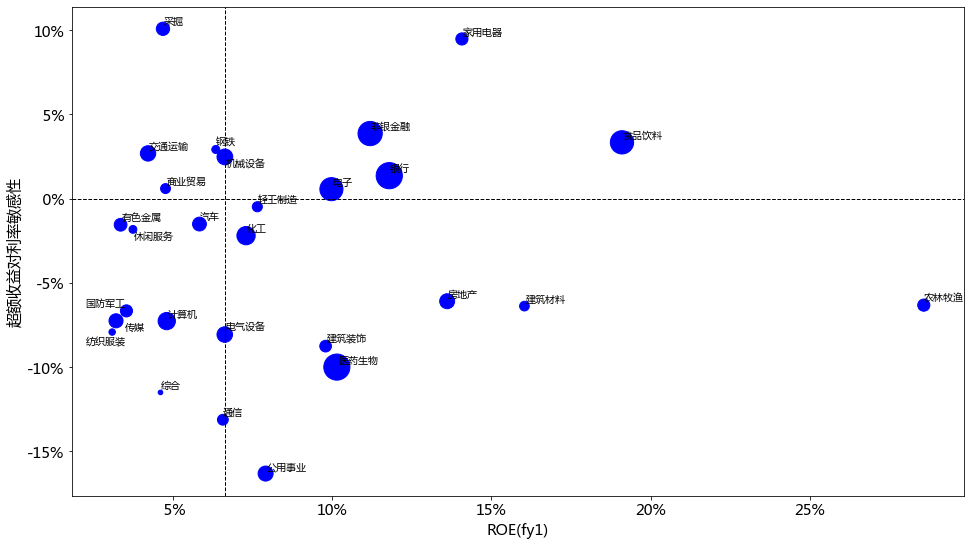

In [86]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.scatter(correlations['roe'], correlations['利率敏感性'], color='blue', s=correlations['cap']/1e10)
ax.axhline(0, color='black', linestyle='--', linewidth=1)
ax.axvline(correlations['roe'].median(), linestyle='--', linewidth=1, color='black')

texts = [ax.text(correlations['roe'][i], correlations['利率敏感性'][i], correlations['证券名称'][i].rstrip('(申万)'), fontsize=10) for i in range(correlations.shape[0])]
adjust_text(texts)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
vals = ax.get_xticks()
ax.set_xticklabels(['{:2.0f}%'.format(x) for x in vals])
ax.set_ylabel('超额收益对利率敏感性', fontsize=15)
ax.set_xlabel('ROE(fy1)', fontsize=15)

fig.savefig(u'C:/Users/zhangyang01/Desktop/申万二级行业ROE与利率敏感性.png', format='png', dpi=400, bbox_inches='tight')